# Titanic Survival Project

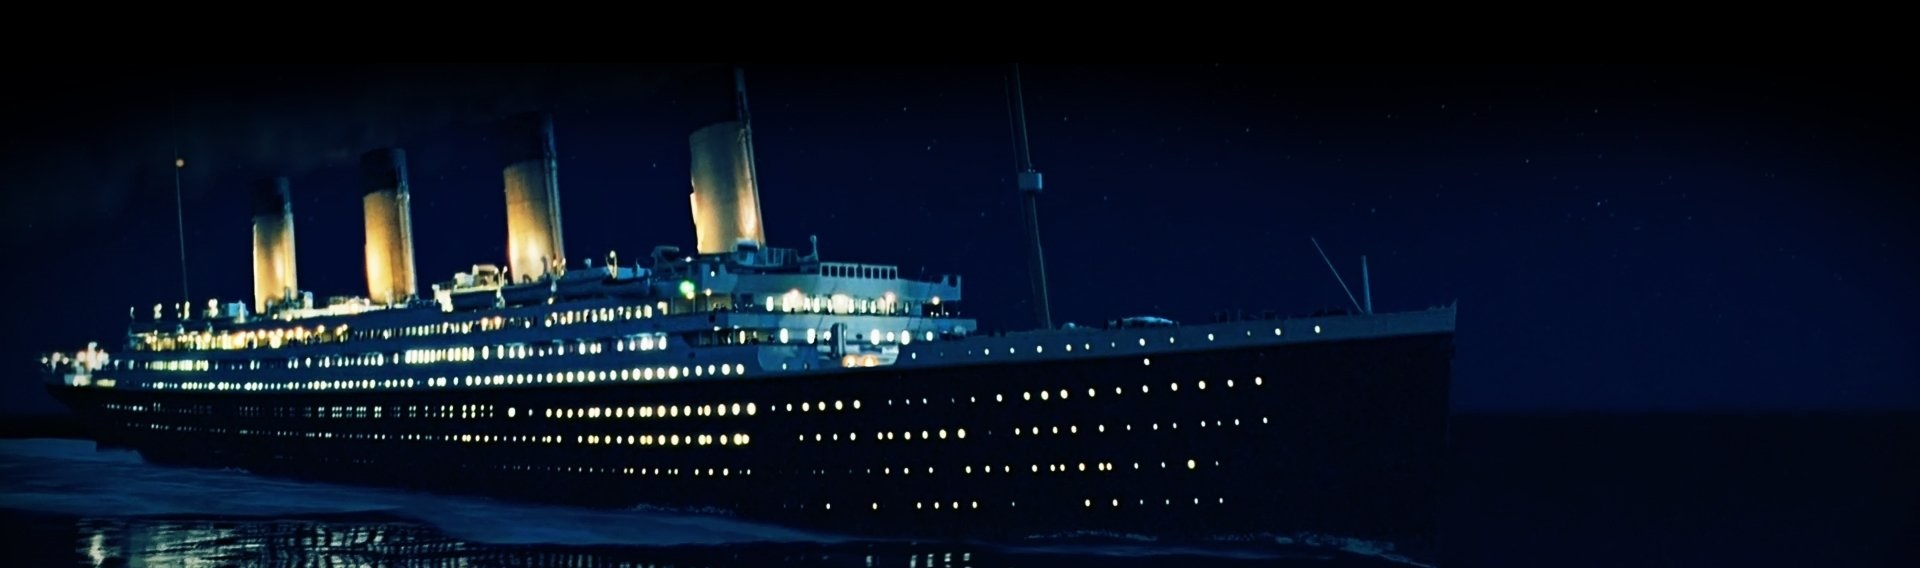

Dataset:

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. The dataset contains passenger information like name, age, gender, socio-economic class, etc. 

Input variables:  

* Passenger id- Unique Id of the passenger
* Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

* Name- Name of the passenger
* Sex- Sex of the passenger (Male, Female)
* Age- Age of the passenger
* Sibsp- Number of Siblings/Spouses Aboard
* Parch- Number of Parents/Children Aboard
* Ticket- Ticket Number
* Fare- Passenger Fare (British pound)
* Cabin- Cabin
* Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)



Output variable:

* Survived- Survived (0 = No; 1 = Yes)

Aim:

Analyse the Titanic dataset  
Develop a machine learning model to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [13]:
pass_df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
pass_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data pre-processing and EDA

In [14]:
pass_df.shape

(891, 12)

In [15]:
pass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
pass_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observations:  
    There are null values in age, cabin and embarked columns

In [17]:
pass_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
nulls=pass_df['Cabin'].isnull().sum()
percent=nulls/pass_df['Cabin'].shape*100
print(f'% of nulls in cabin column: {percent} %')

% of nulls in cabin column: [77.1043771] %


In [19]:
# delete cabin column as it 77% nulls
pass_df.drop(columns='Cabin', inplace=True)

In [20]:
# using median/mode to fill nulls in Age column will create false data. So, we could use the titles present in the name 
# column and calculate the median age for each set of titles and fill the nulls.

pass_df['title']=pass_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
pass_df['title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: title, Length: 891, dtype: object

In [21]:
newage= pass_df.groupby('title')['Age'].median()
newage

title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          46.5
Jonkheer    38.0
Lady        48.0
Major       48.5
Master       3.5
Miss        21.0
Mlle        24.0
Mme         24.0
Mr          30.0
Mrs         35.0
Ms          28.0
Rev         46.5
Sir         49.0
Name: Age, dtype: float64

In [22]:
pass_df['Age'].fillna(pass_df['title'].map(newage), inplace=True)

In [23]:
pass_df.drop(columns='title', inplace=True)

In [24]:
# drop nulls in embarked column
pass_df.dropna(subset=['Embarked'],inplace=True)

In [25]:
# check nulls after filling
pass_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [26]:
pass_df.select_dtypes(include='object')

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,S
887,"Graham, Miss. Margaret Edith",female,112053,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S
889,"Behr, Mr. Karl Howell",male,111369,C


In [27]:
# Encode sex
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in ['Sex', 'Ticket','Embarked']:
    if column in pass_df.columns:
        pass_df[column] = le.fit_transform(pass_df[column])
pass_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,522,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,595,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,668,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,48,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,471,8.0500,2


In [28]:
# check number of unique values in each feature column
unique=pass_df.nunique()
pd.DataFrame(unique,columns=['No. of unique values'])

,No. of unique values
PassengerId,889
Survived,2
Pclass,3
Name,889
Sex,2
Age,90
SibSp,7
Parch,7
Ticket,680
Fare,247


In [29]:
# check for duplicates
duplicates=pass_df.duplicated()

print('No. of duplicates in the dataset: ', pass_df.duplicated().sum())

No. of duplicates in the dataset:  0


In [31]:
# take the count of each unique value in each feature column
for i in pass_df.columns:
    print(pass_df.value_counts(pass_df[i]),'\n')

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
302    1
303    1
304    1
305    1
891    1
Name: count, Length: 889, dtype: int64 

Survived
0    549
1    340
Name: count, dtype: int64 

Pclass
3    491
1    214
2    184
Name: count, dtype: int64 

Name
Abbing, Mr. Anthony                        1
Nysveen, Mr. Johan Hansen                  1
Nicholson, Mr. Arthur Ernest               1
Nicola-Yarred, Master. Elias               1
Nicola-Yarred, Miss. Jamila                1
                                          ..
Goodwin, Miss. Lillian Amy                 1
Goodwin, Mr. Charles Edward                1
Goodwin, Mrs. Frederick (Augusta Tyler)    1
Graham, Miss. Margaret Edith               1
van Melkebeke, Mr. Philemon                1
Name: count, Length: 889, dtype: int64 

Sex
1    577
0    312
Name: count, dtype: int64 

Age
30.00    144
21.00     60
35.00     35
24.00     30
22.00     27
        ... 
20.50      1
14.50      1
12.00      1
0.92       1
80.00 

Observations:  
The dataset contains high number of data of passengers who didnt survive.  
Majority of passengers belonged to passenger class= 3  
Male passengers were comparitively higher than female passengers.  
Majority of the passengers were 30 years old.  
Out of 891 passengers, 608 had no siblings/spouses aboard; they were single passengers  
There were 678 parents/children aboard     
Majority passengers (644) boarded from Southampton  

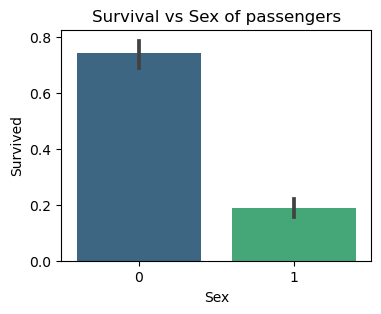

In [32]:
plt.figure(figsize=(4,3))
sns.barplot(x='Sex',y='Survived',data=pass_df,palette='viridis')
plt.title('Survival vs Sex of passengers')
plt.show()

Observation:  
    Among the total passengers who survived, majority were women.
    

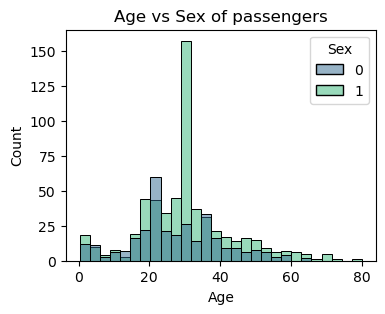

In [33]:
plt.figure(figsize=(4,3))
sns.histplot(x='Age',hue='Sex',data=pass_df,palette='viridis')
plt.title('Age vs Sex of passengers')
plt.show()

Observation:  
    Among the survived male and female passengers, majority were in the age group 20-40.   

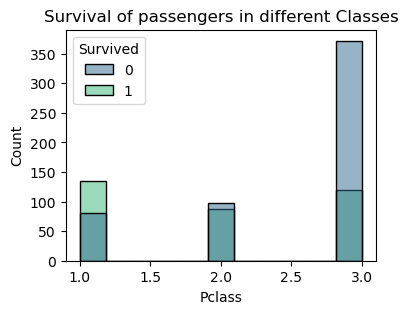

In [34]:
plt.figure(figsize=(4,3))
sns.histplot(x='Pclass',hue='Survived',data=pass_df,palette='viridis')
plt.title('Survival of passengers in different Classes')
plt.show()

Observation:  
Among the survived passengers, majority were First-Class passengers.  
Majority of Third-Class passengers didnt survive the ship-wreck.

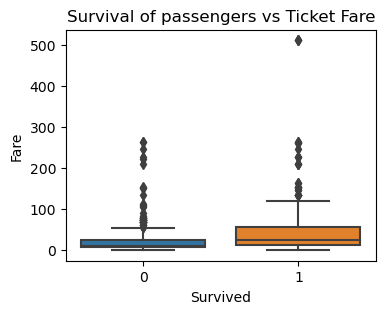

In [147]:
plt.figure(figsize=(4,3))
sns.boxplot(x=pass_df['Survived'],y=pass_df['Fare'])
plt.title('Survival of passengers vs Ticket Fare')
plt.show()

Observation:  
    The ticket fare distribution of survivored passengers is skewed towards higher range. So passengers who survived had a higher ticket fare than the passengers who didnt survive.

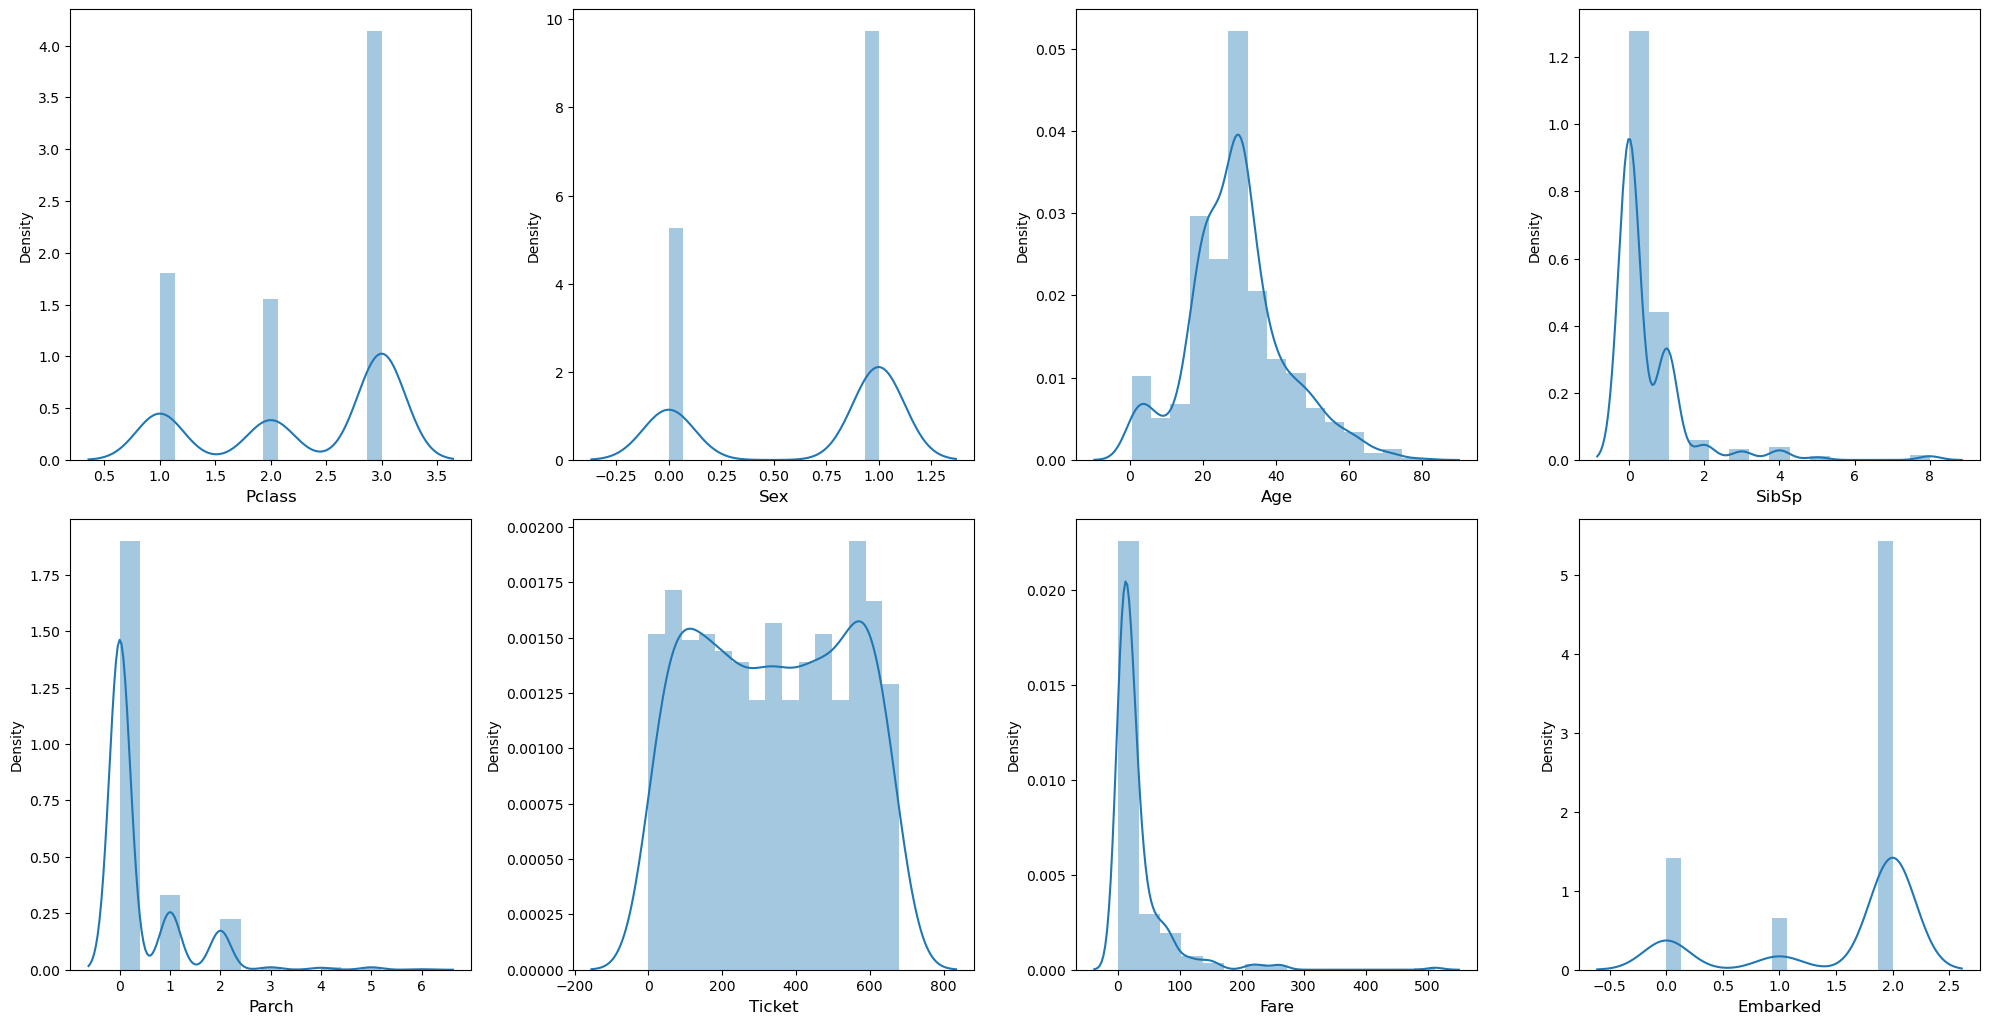

In [38]:
# check data distribution

x=pass_df[['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']]
y=pass_df.Survived

plt.figure(figsize=(20,15))
plot=1
for col in x:
    if plot<=10:
        ax=plt.subplot(3,4,plot)
        sns.distplot(x[col],bins=15)
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

Observation:  
    There is left-skewness in SibSp, Parch and Fare

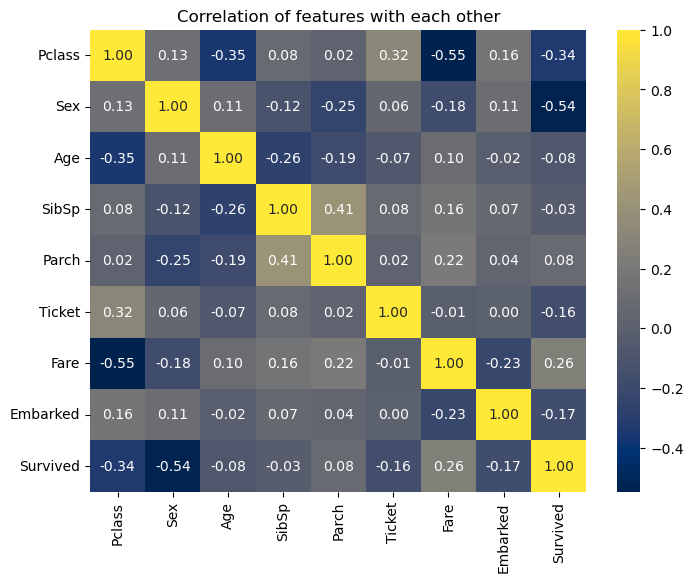

In [39]:
# correlation matrix
x=pass_df[['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked','Survived']]
cm= x.corr()
plt.figure(figsize=(8,6))

sns.heatmap(cm, annot=True,cmap='cividis',fmt='.2f')
plt.title('Correlation of features with each other')
plt.show()

Observations:  
Survival has highest correlation with Sex of the passengers followed by Passenger class and Sib/Sp.  
Fare and Pclass show signs of multicollinearity (-0.75).

In [40]:
# convert datatype of Age from float to int
pass_df['Age']=pass_df['Age'].astype('int')

In [41]:
# confirm multicollinearity by vif
x=pass_df[['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']]

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
0,Pclass,1.951819
6,Fare,1.714345
4,Parch,1.323360
3,SibSp,1.299756
2,Age,1.259541
5,Ticket,1.170347
1,Sex,1.116229
7,Embarked,1.083016


Observation:  
As vif values are not significantly high, all the features can be retained.

In [42]:
# splitting dataset into training and testing sets

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=67)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(666, 8) (223, 8) (666,) (223,)


# MODEL BUILDING & VALIDATION

In [43]:
# define functions for training and evaluation of models

def score(model,x_train,y_train,x_test,y_test,train=True):
    if train:
        y_pred1= model.predict(x_train)
        print('Accuracy of train set: ',accuracy_score(y_train,y_pred1))
    else:
        y_pred2= model.predict(x_test)
        print('Accuracy of test set: ',accuracy_score(y_test,y_pred2))
        print(f'\nClassification report of {model} model  :\n\n {classification_report(y_test,y_pred2,digits=2)}')
        
        plt.figure(figsize=(4,3))
        cnf_matrix=metrics.confusion_matrix(y_test,y_pred2)
        cnf_df=pd.DataFrame(cnf_matrix)
        sns.heatmap(cnf_df, annot=True, annot_kws={'size':12},cmap='YlGnBu',fmt='g')
        plt.title(f'Confusion matrix for {model} model')
        plt.xlabel('Predicted Survival')
        plt.ylabel('Actual Survival')
        plt.show()
        
# cross-validation of the model
def cv(model):
    cv_score=cross_val_score(model,x,y,cv=5).mean()
    print (f'\nCross validation score of the {model} model : {cv_score}')

Accuracy of train set:  0.7957957957957958
Accuracy of test set:  0.8116591928251121

Classification report of LogisticRegression() model  :

               precision    recall  f1-score   support

           0       0.86      0.84      0.85       144
           1       0.72      0.76      0.74        79

    accuracy                           0.81       223
   macro avg       0.79      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



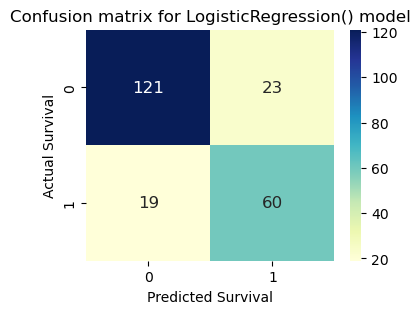


Cross validation score of the LogisticRegression() model : 0.7930489430584651


In [44]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

score(lr,x_train,y_train,x_test,y_test,train=True)
score(lr,x_train,y_train,x_test,y_test,train=False)

cv(lr)

Accuracy of train set:  0.8588588588588588
Accuracy of test set:  0.7937219730941704

Classification report of KNeighborsClassifier() model  :

               precision    recall  f1-score   support

           0       0.83      0.86      0.84       144
           1       0.73      0.67      0.70        79

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.79      0.79      0.79       223



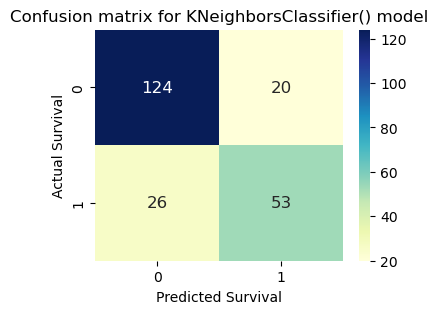


Cross validation score of the KNeighborsClassifier() model : 0.7008252396368946


In [45]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

score(knn,x_train,y_train,x_test,y_test,train=True)
score(knn,x_train,y_train,x_test,y_test,train=False)
cv(knn)

Accuracy of train set:  0.9984984984984985
Accuracy of test set:  0.726457399103139

Classification report of DecisionTreeClassifier() model  :

               precision    recall  f1-score   support

           0       0.80      0.77      0.78       144
           1       0.61      0.65      0.63        79

    accuracy                           0.73       223
   macro avg       0.70      0.71      0.71       223
weighted avg       0.73      0.73      0.73       223



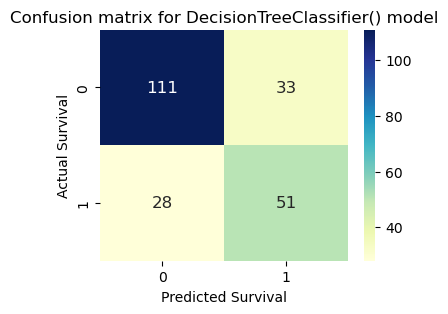


Cross validation score of the DecisionTreeClassifier() model : 0.7795531009966356


In [46]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

score(dt,x_train,y_train,x_test,y_test,train=True)
score(dt,x_train,y_train,x_test,y_test,train=False)
cv(dt)

Accuracy of train set:  0.9984984984984985
Accuracy of test set:  0.8295964125560538

Classification report of RandomForestClassifier() model  :

               precision    recall  f1-score   support

           0       0.86      0.88      0.87       144
           1       0.77      0.73      0.75        79

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223



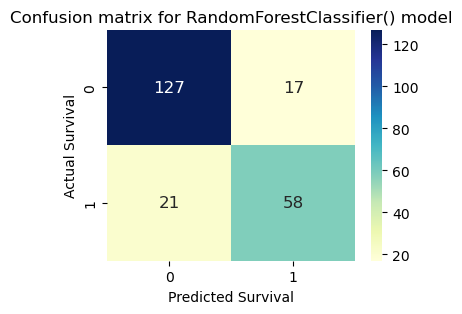


Cross validation score of the RandomForestClassifier() model : 0.8234304576905986


In [47]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

score(rf,x_train,y_train,x_test,y_test,train=True)
score(rf,x_train,y_train,x_test,y_test,train=False)
cv(rf)

Accuracy of train set:  0.8453453453453453
Accuracy of test set:  0.8340807174887892

Classification report of SVC(probability=True) model  :

               precision    recall  f1-score   support

           0       0.86      0.89      0.87       144
           1       0.78      0.73      0.76        79

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



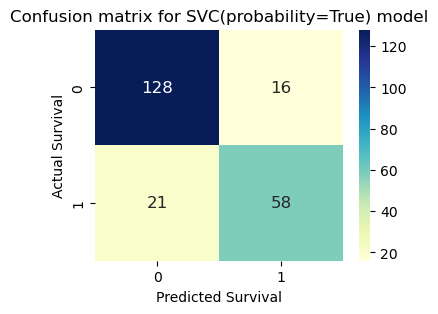


Cross validation score of the SVC(probability=True) model : 0.679476925030153


In [48]:
# SVM
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(x_train,y_train)

score(svc,x_train,y_train,x_test,y_test,train=True)
score(svc,x_train,y_train,x_test,y_test,train=False)
cv(svc)

Accuracy of train set:  0.9264264264264265
Accuracy of test set:  0.8475336322869955

Classification report of GradientBoostingClassifier() model  :

               precision    recall  f1-score   support

           0       0.88      0.89      0.88       144
           1       0.79      0.77      0.78        79

    accuracy                           0.85       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.85      0.85      0.85       223



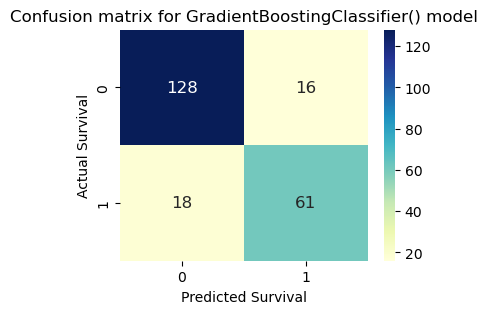


Cross validation score of the GradientBoostingClassifier() model : 0.8380689392496666


In [83]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

score(gbc,x_train,y_train,x_test,y_test,train=True)
score(gbc,x_train,y_train,x_test,y_test,train=False)
cv(gbc)

Observations:  
Models classify passengers not survived better than survived pasengers.  
We could use'precision-recall-curve' to find the better model as all the models detect few number of false positives and false negatives too.

F1 score of Logistic Regression model is  0.7407407407407407
F1 score of Decision Tree model is  0.6086956521739131
F1 score of KNN model is  0.6973684210526316
F1 score of Random Forest model is  0.7581699346405228
F1 score of SVC model is  0.7581699346405228
F1 score of Gradient Boost model is  0.7820512820512822


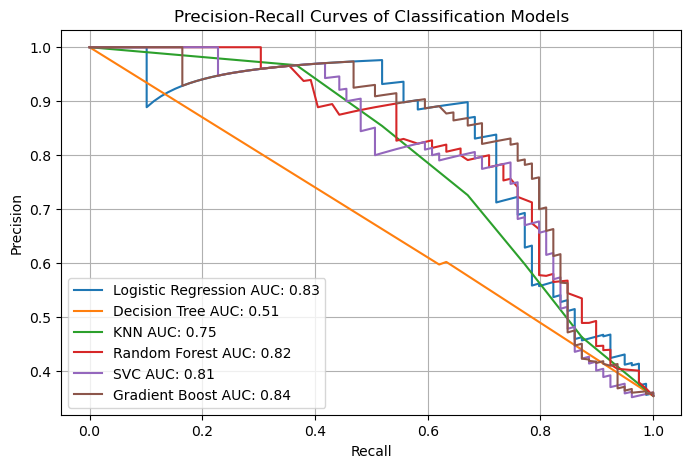

In [85]:
# precision-recall-curve

from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, average_precision_score

models = {'Logistic Regression': lr,'Decision Tree': dt,'KNN': knn, 'Random Forest': rf,'SVC': svc,
          'Gradient Boost': gbc}


def pr_curve(data,x_test,y_test):
    
    plt.figure(figsize=(8,5))
    
    for name, model in models.items():
        
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        y_prob=model.predict_proba(x_test)[:,1]
        fs=f1_score(y_test,y_pred)
        print(f'F1 score of {name} model is  {fs}')

    
        precision, recall,threshold = precision_recall_curve(y_test,y_prob)
        aps=average_precision_score(y_test,y_prob)
        plt.plot(recall, precision,label=f'{name} AUC: {aps:.2f}')

    
    plt.title('Precision-Recall Curves of Classification Models')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.legend(loc='best')   
    plt.show()

pr_curve(models,x_test,y_test)

Observations:  
Gradient Boosting seems to be the better model with highest AUC of 0.84. So we could use it for further hyperparameter tuning.

In [106]:
# Hyperparameter tuning of the selected model (Gradient Boosting) using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

params={ 'n_estimators':[100,150,200,250,300], 'learning_rate':[0.01,0.05,0.1,0.5,1], 'max_depth':[2,3,4,5,6,7],
        'min_samples_split':[2,4,6],'min_samples_leaf':[1,2,3,4]}

rs=RandomizedSearchCV(estimator=gbc, param_distributions=params, scoring='accuracy',cv=5)
rs.fit(x_train,y_train)
print(f'Best parameters for Random Forest model: {rs.best_params_} and best score is : {rs.best_score_}')

Best parameters for Random Forest model: {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 3, 'learning_rate': 0.05} and best score is : 0.813803164627988


Accuracy of train set:  0.8978978978978979
Accuracy of test set:  0.852017937219731

Classification report of GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=3,
                           min_samples_split=4, n_estimators=125) model  :

               precision    recall  f1-score   support

           0       0.87      0.90      0.89       144
           1       0.81      0.76      0.78        79

    accuracy                           0.85       223
   macro avg       0.84      0.83      0.84       223
weighted avg       0.85      0.85      0.85       223



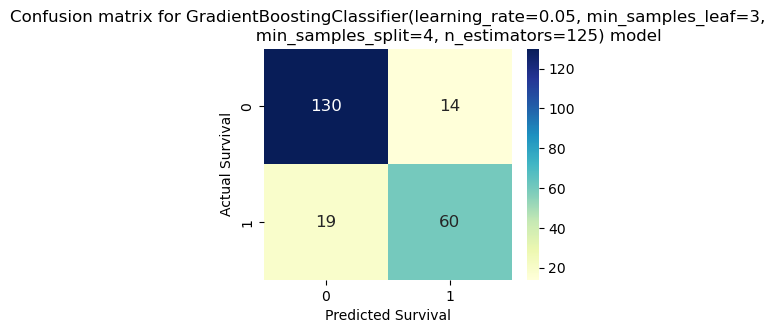


Cross validation score of the GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=3,
                           min_samples_split=4, n_estimators=125) model : 0.824585793182251


In [113]:
# Manual tuning also done after hyperparameter tuning to improve scores
gbc1=GradientBoostingClassifier(n_estimators= 125, min_samples_split= 4, min_samples_leaf= 3, 
                                max_depth= 3, learning_rate= 0.05)
gbc1.fit(x_train,y_train)

score(gbc1,x_train,y_train,x_test,y_test,train=True)
score(gbc1,x_train,y_train,x_test,y_test,train=False)
cv(gbc1)

Observations:  
Tuned Gradient Boosting model (gbc1) has slightly higher accuracy (0.852) than the untuned model.
Therefore, gbc1 is selected as the best model for the classification problem.

In [142]:
# save the model
import pickle
pickle.dump(gbc1, open('Titanic_prediction_gbc1.pkl','wb'))

In [143]:
# load model and view prediction vs actual charges
gb_model=pickle.load(open('Titanic_prediction_gbc1.pkl','rb'))
y_pred=gb_model.predict(x_test)

result=pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
result

,Predicted,Actual
634,0,0
791,0,0
115,0,0
241,1,1
470,0,0
...,...,...
561,0,0
539,1,1
215,1,1
680,1,0


# Overall Summary

The dataset on "Titanic Survival Project" was used to analyse and build machine learning models to predict passenger survival.

# Data Insights

* The dataset contains high number of data of passengers who didnt survive.
* Majority of passengers belonged to passenger class= 3
* Male passengers were comparitively higher than female passengers.
* Majority of the passengers were 30 years old.
* Out of 891 passengers, 608 had no siblings/spouses aboard; they were single passengers
* There were 678 parents/children aboard
* Majority passengers (644) boarded from Southampton
* Among the total passengers who survived, majority were women.
* Among the survived male and female passengers, majority were in the age group 20-40.
* The ticket fare distribution of survivored passengers is skewed towards higher range. So passengers who survived had a higher ticket fare than the passengers who didnt survive.
  

# Selected model

Gradient Boosting Classifier (gbc1) is found to be the best model among the models for this classification task with:

   * Accuracy score: 0.852
   * Cross Validation: 0.824